In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import nltk

In [24]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [54]:
df = pd.read_csv('/Users/niharikadhapola/Downloads/archive-4/1429_1.csv')
df['Number'] = df.index + 1
print(df.shape)
df = df.head(500)
print(df.shape)

(34660, 22)
(500, 22)


/var/folders/0d/jwbfl6cx6ns9gb70m0l2bryc0000gn/T/ipykernel_13516/2231658573.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/niharikadhapola/Downloads/archive-4/1429_1.csv')


In [55]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,Number
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,1
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,2
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,3
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,4
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,5


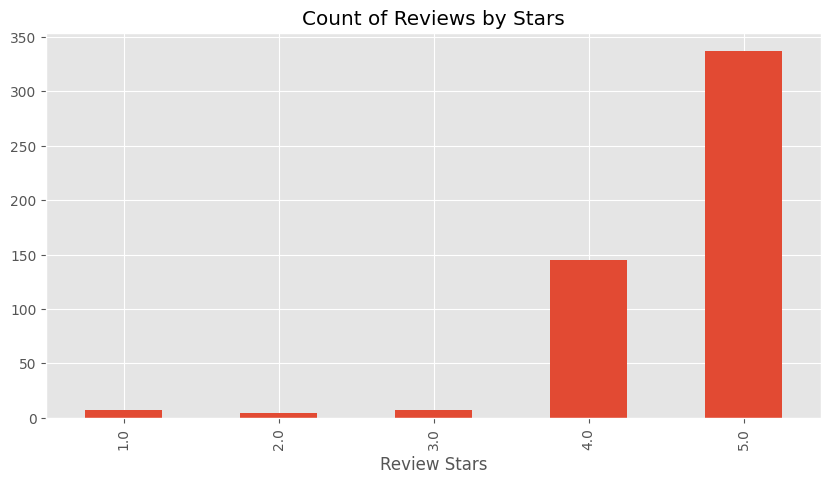

In [56]:

ax = df['reviews.rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## NLTK

In [58]:
example = df['reviews.text'][50]
print(example)

This 8 inch Fire is definitely better than the cheaper 7 inch. It works fine enough for teens to play games and watch movies.


In [59]:
tokens = nltk.word_tokenize(example)

In [60]:
tagged = nltk.pos_tag(tokens) #part of speach
tagged[:10]

[('This', 'DT'),
 ('8', 'CD'),
 ('inch', 'NN'),
 ('Fire', 'NNP'),
 ('is', 'VBZ'),
 ('definitely', 'RB'),
 ('better', 'RBR'),
 ('than', 'IN'),
 ('the', 'DT'),
 ('cheaper', 'JJR')]

In [61]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  8/CD
  inch/NN
  (ORGANIZATION Fire/NNP)
  is/VBZ
  definitely/RB
  better/RBR
  than/IN
  the/DT
  cheaper/JJR
  7/CD
  inch/NN
  ./.
  It/PRP
  works/VBZ
  fine/JJ
  enough/RB
  for/IN
  teens/NNS
  to/TO
  play/VB
  games/NNS
  and/CC
  watch/NN
  movies/NNS
  ./.)


Vader Sentiment Scoring
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

In [62]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [63]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [64]:
sia.polarity_scores(example)

{'neg': 0.082, 'neu': 0.582, 'pos': 0.336, 'compound': 0.7506}

In [74]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['reviews.text']
    myid = row['Number']
    res[myid] = sia.polarity_scores(text)
print(res[myid])

  0%|          | 0/500 [00:00<?, ?it/s]

{'neg': 0.142, 'neu': 0.81, 'pos': 0.047, 'compound': -0.5267}


In [75]:
res

{1: {'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.9194},
 2: {'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'compound': 0.8934},
 3: {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.4404},
 4: {'neg': 0.036, 'neu': 0.683, 'pos': 0.281, 'compound': 0.9884},
 5: {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.7876},
 6: {'neg': 0.053, 'neu': 0.766, 'pos': 0.182, 'compound': 0.7096},
 7: {'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.8885},
 8: {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.9273},
 9: {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.7809},
 10: {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369},
 11: {'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.3412},
 12: {'neg': 0.0, 'neu': 0.515, 'pos': 0.485, 'compound': 0.8555},
 13: {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.8799},
 14: {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612},
 15: {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369},

In [77]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Number'})
vaders = vaders.merge(df, how='left')

In [78]:
vaders.head()

,Number,neg,neu,pos,compound,id,name,asins,brand,categories,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,1,0.000,0.599,0.401,0.9194,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,2,0.000,0.483,0.517,0.8934,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,3,0.000,0.896,0.104,0.4404,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,4,0.036,0.683,0.281,0.9884,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,5,0.000,0.914,0.086,0.7876,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


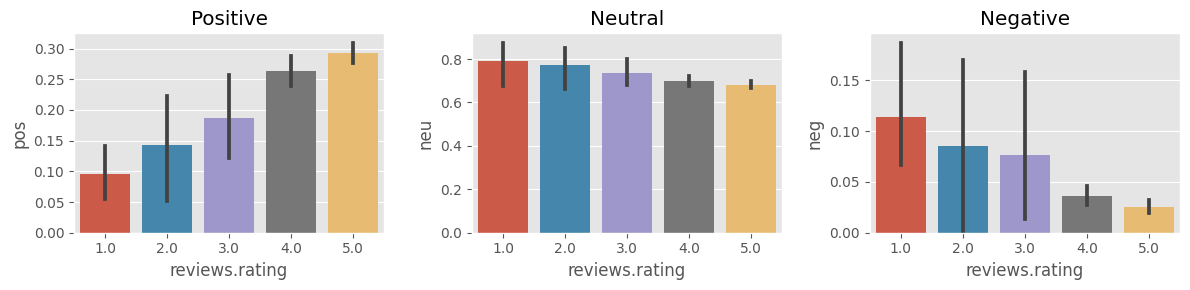

In [79]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='reviews.rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='reviews.rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='reviews.rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Roberta Pretrained Model
Use a model trained of a large corpus of data.
Transformer model accounts for the words but also the context related to other words.

In [81]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 1.3 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.4/401.4 kB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [82]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [83]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [84]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This 8 inch Fire is definitely better than the cheaper 7 inch. It works fine enough for teens to play games and watch movies.


{'neg': 0.082, 'neu': 0.582, 'pos': 0.336, 'compound': 0.7506}

In [85]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0070559196, 'roberta_neu': 0.05336031, 'roberta_pos': 0.93958384}


In [86]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [88]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['reviews.text']
        myid = row['Number']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [90]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Number'})
results_df = results_df.merge(df, how='left')

In [91]:
results_df.columns

Index(['Number', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'id', 'name', 'asins',
       'brand', 'categories', 'keys', 'manufacturer', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username'],
      dtype='object')

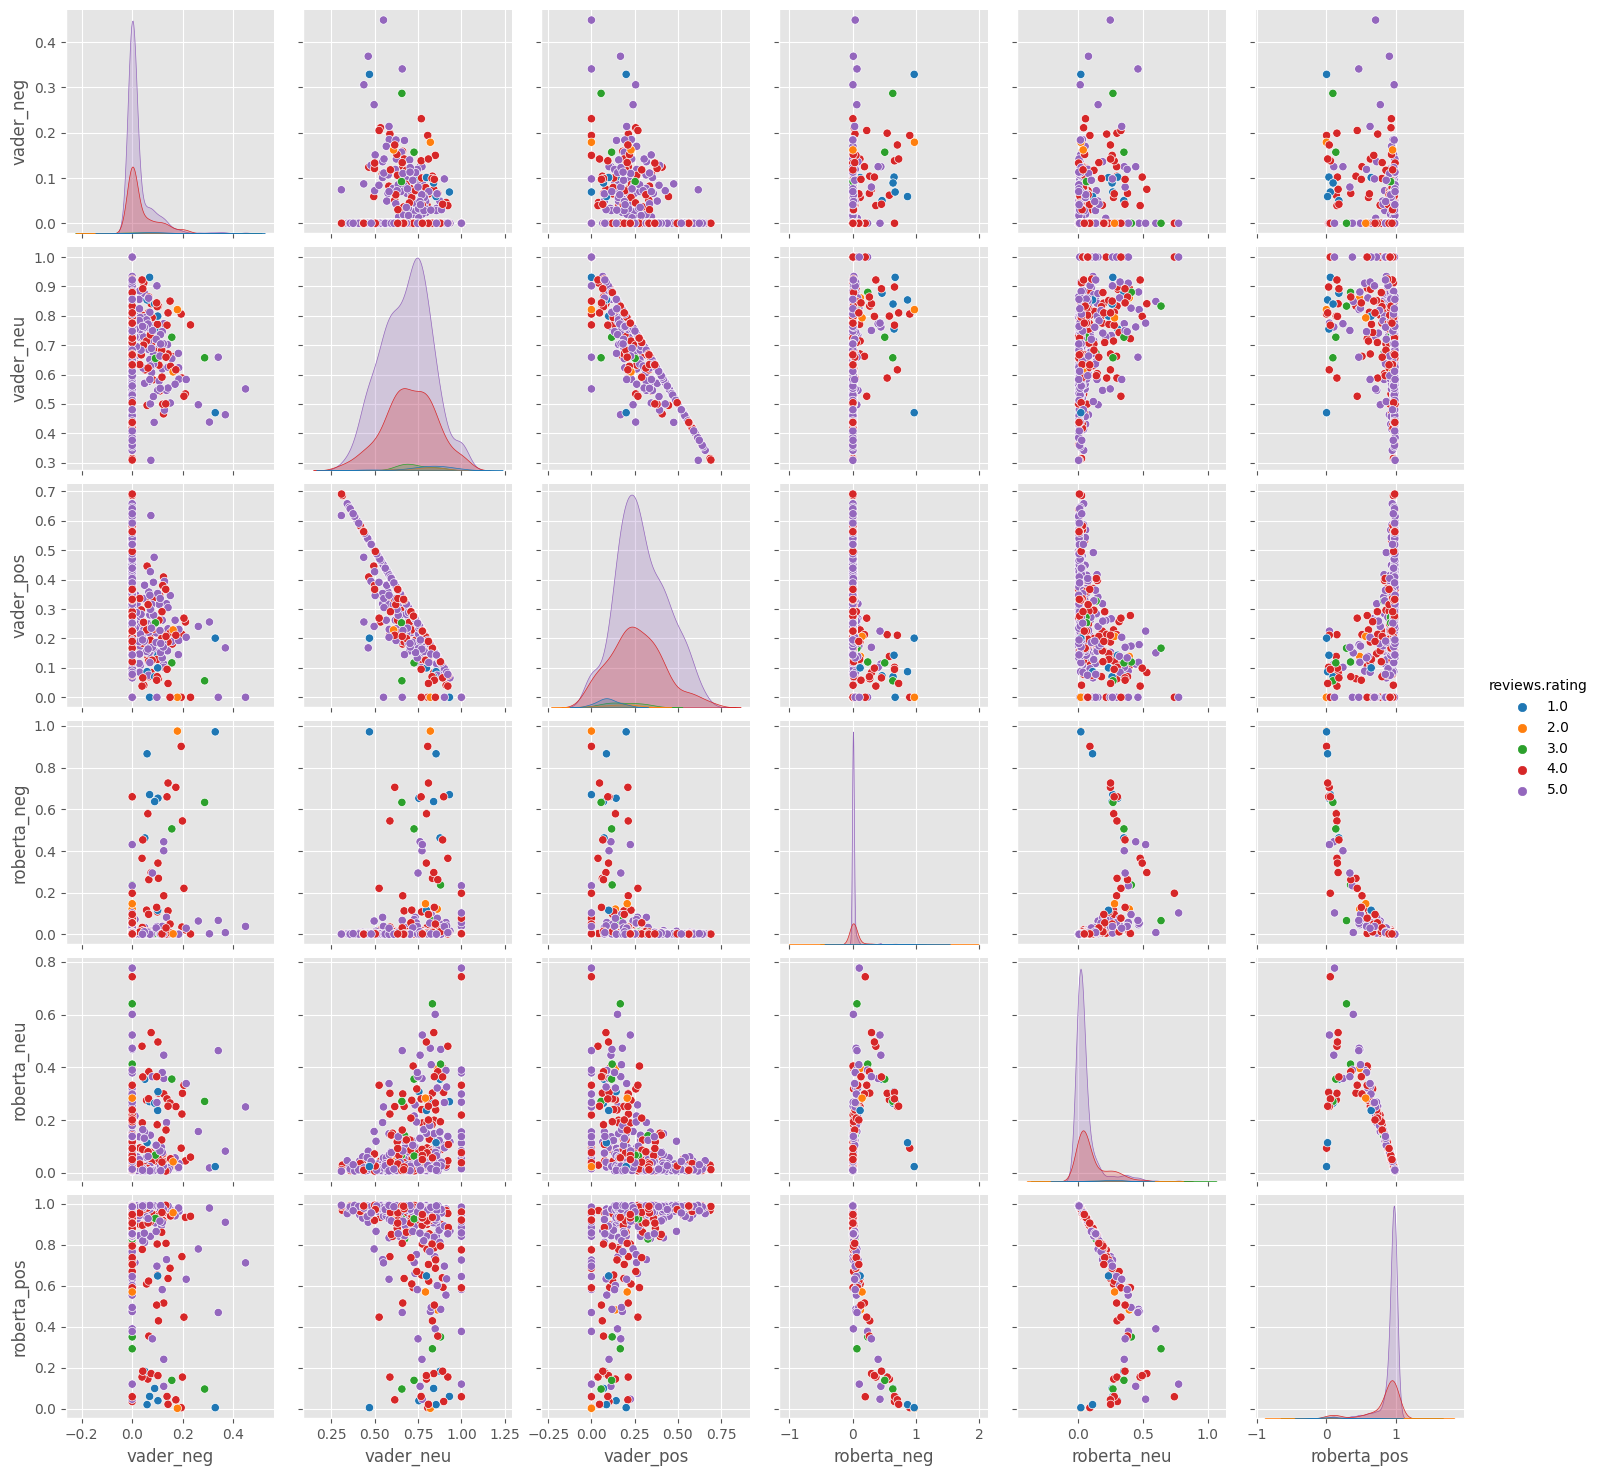

In [93]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='reviews.rating',
            palette='tab10')
plt.show()

Reviews

In [103]:
results_df[results_df['reviews.rating'] == 1.0] \
    .sort_values('roberta_pos', ascending=False)['reviews.text'].values[0]


'I liked it at first except the browser is kind of clunky. Also you can. It use all android Apps. The worst thing though was mine just stopped working in the middle of watching a movie on a long plane flight. It was fully charged. I have tried recharging and turning on etc. it is just a blank screen and off. Kind of a cool paperweight. Hope I can get my money back. Or get a new one.'

In [107]:

results_df[results_df['reviews.rating'] == 1.0] \
    .sort_values('vader_pos', ascending=False)['reviews.text'].values[0]    

'not good, hate it , never buy it again, sucks. done'

In [108]:
results_df[results_df['reviews.rating'] == 5.0] \
    .sort_values('roberta_neg', ascending=False)['reviews.text'].values[0]

'A family member has vision problems. They had seen/used the Kindle of another family member - especially the ability to scale text. This device will make it possible to read, which she has had extreme difficulty doing.'

In [109]:
results_df[results_df['reviews.rating'] == 5.0] \
    .sort_values('vader_neg', ascending=False)['reviews.text'].values[0]    

'Ipad killer! A fierce tablet at a convinient price!'

In [110]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
sent_pipeline('I love sentiment analysis!')

Reference

https://www.youtube.com/watch?v=QpzMWQvxXWk

https://www.youtube.com/watch?v=4XqAK5HEobE